In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np

from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import re
import matplotlib.pyplot as plt
import pandas as pd

embedder = SentenceTransformer('distilroberta-base-paraphrase-v1')

Testing Sentence Database:

In [2]:
# Objective 1: File Path and Reading
df = pd.read_csv("Foia.csv")
df = df.fillna(method="ffill")

In [3]:
def str_to_split(x):
    return re.sub(r'\W+', ' ', x).split()

In [4]:
sentence = []
for index, row in df.iterrows():
    sentence.append(row['Description'])

In [5]:
sentence

['All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.',
 'Information relating to an operation at the end of the Gulf War in April of 1991\ndubbed "Operation Manly Rip".',
 'A clearly releasable copy of Sections A through J of the awarded contract, including the statement of work, for the contract awarded from solicitation number HROO11O6ROO2.',
 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number EFTHQ00038615002.',
 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number BAA0539.',
 'A clearly releasable copy of Section A (the cover page) of any contract awarded to\ndate off of solicitation number BAAO6O6.',
 'All documents from March 1 through December 31, 2003 concerned with\ndiscussions with the United Kingdom regarding 1) the establishment of the Coalition Provisional Authority in Iraq; and 2) the legal status of the CPA.

In [6]:
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]

In [7]:
corpus_embeddings = embedder.encode(sentence)

In [8]:
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

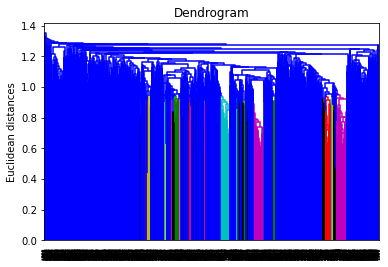

In [9]:
Z = hierarchy.linkage(corpus_embeddings, "average")
dn = hierarchy.dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
#plt.xlim(0,100)
#plt.ylim(0,0.05)
plt.show()

In [10]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.4) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(sentence[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  998
['All records regarding the service of the 208th Engineer Combat Battalion anytime between December 7, 1941 and January 1, 1947.']

Cluster  992
['Information relating to an operation at the end of the Gulf War in April of 1991\ndubbed "Operation Manly Rip".']

Cluster  45
['A clearly releasable copy of Sections A through J of the awarded contract, including the statement of work, for the contract awarded from solicitation number HROO11O6ROO2.', 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number EFTHQ00038615002.', 'A copy of Section A (the cover page) for any contract awarded to date from\nsolicitation number BAA0539.', 'A clearly releasable copy of Section A (the cover page) of any contract awarded to\ndate off of solicitation number BAAO6O6.', 'A clearly releasable copy of sections A through J of the contract, including the statement of work, for the contract awarded from solicitation number\nHQ003406T0016.', 'The cover page

['Information dealing with any actions taken by the Pentagon Force Protection Agency on employees improper use of government computer, Internet or web site\nunder the FOIA.']

Cluster  949
['Names of the 33 men who were shot down and taken prisoner in Vietnam in\nDecember of 1972 during Operation Linebacker 2.']

Cluster  1435
['Records concerning four of the seventeen ethnic Uighurs from China presently detained at Gantanamo Bay Naval Base, Cuba: Ahnad Tourson (ISN 201), Abdur Razakah (ISN 219), Abdul Rahman a/k/a Abdul Ghaffar (ISN 281), and Adel Noori\n(ISN 584).']

Cluster  1353
['Information or data concerning DOD policy of sending military personnel in mixed\nracial marriages to Fort Lewis during the 1950’s and 1960’s.']

Cluster  1407
['Information concerning DOD policy on the rationing of bananas in S. Korea during the 1984-1985 time period as a result of a dispute between S. Korean and the Phillipines over the trade of bananas and Korean apples.']

Cluster  1388
['Records betw

Cluster  1343
['Request Message: If (          ) date of birth is March 07,1940 in Camden SC.']

Cluster  1012
['Any and all information regarding contracts awarded/sought by any entity researching long-term and/or short-term effects of non-lethal, directed energy\nweapons.']

Cluster  932
['Requesting: 1. Material relating to Israel 1981-89 2. Material relating to Saudi Arabia 1981-89 3. Material relating to Syria 1981-89 4. Material relating to Iraq\n1981-89.']

Cluster  1099
['Records pertaining to any involvement the United States had in the Iran-Iraq War,\nSeptember 22, 1980 to August 1988.']

Cluster  1587
['Information regarding research undertaken and funding granted to any service affiliated with the Department of Defense seeking to obtain information on']

Cluster  1255
['The Defense Prisoner of War/Missing Personnel Office (DPMO) referral concerning photographs for 2258 military individuals.']

Cluster  1086
['Requesting the following data: 1) A breakdown of the draft number

Cluster  310
['The resume scores, the oral board scores, and final list with the names that were recommended by the Chief of the Pentagon Police and submitted to the Director of PFPA. This sergeant’s board was from job announcement # PFP 060878.', 'The resume scores, the oral board scores, and final list with the names that were recommended by the Director of Criminal Investigations Division and submitted to the Director of PFPA. This Criminal Investigator / Special Agents board was from job announcement # PFP 060879.']

Cluster  703
['A list of members of Congress who attended the briefing held at the Pentagon by\nGen. Petraeus on July 19, 2007.']

Cluster  590
['Records for my late husband William C Jones Jr. for the Dept of Health and Human\nservices, Depart. of Energy, and Dept of Labor.']

Cluster  396
['All documents and records from January 1, 2006 thru present concerning bilateral discussions between the United States and Israel regarding the possible construction of an oil pip

In [11]:
len(clustered_sentences)

1599

In [15]:
clustered_sentences[0]

['All documents related to the May 1, 2006, memo by Defense Secretary Donald Rumsfeld entitled: "Illustrative New 21st Century Institutions and Approaches."',
 'All records relating to Defense Secretary Donald Ruinsfeld’s diplomatic visits to Saudi Arabia, Oman, Uzbekistan, the United Arab Emirates, Bahramn, and Qatar,\nbetween October 2 and Octoher 6, 2001.',
 'All documents concerned with Defense Secretary Donald Rumsfeld’s June 2002 visits to Kuwait, Bahrain, and Qatar.']

In [13]:
def freq(x):
    D = dict()
    for i in x:
        Str = i.split()
        for j in Str:
            if j in D:
                D[j] += 1
            else:
                D[j] = 1
    return sorted(D.items(), key=lambda x: x[1], reverse=True)
        

In [14]:
freq(corpus)

[('is', 10),
 ('A', 8),
 ('a', 7),
 ('man', 5),
 ('eating', 3),
 ('of', 2),
 ('The', 2),
 ('riding', 2),
 ('on', 2),
 ('playing', 2),
 ('drums.', 2),
 ('cheetah', 2),
 ('food.', 1),
 ('piece', 1),
 ('bread.', 1),
 ('pasta.', 1),
 ('girl', 1),
 ('carrying', 1),
 ('baby.', 1),
 ('baby', 1),
 ('carried', 1),
 ('by', 1),
 ('the', 1),
 ('woman', 1),
 ('horse.', 1),
 ('white', 1),
 ('horse', 1),
 ('an', 1),
 ('enclosed', 1),
 ('ground.', 1),
 ('monkey', 1),
 ('Someone', 1),
 ('in', 1),
 ('gorilla', 1),
 ('costume', 1),
 ('set', 1),
 ('running', 1),
 ('behind', 1),
 ('its', 1),
 ('prey.', 1),
 ('chases', 1),
 ('prey', 1),
 ('across', 1),
 ('field.', 1)]